In [1]:
seznam3=[];
for G in graphs.nauty_geng('3 -c'):
    seznam3.append(G)


In [2]:
seznam4=[];
for G in graphs.nauty_geng('4 -c'):
    seznam4.append(G)


In [3]:
seznam5=[];
for G in graphs.nauty_geng('5 -c'):
    seznam5.append(G)
    

In [4]:
seznam6=[];
for G in graphs.nauty_geng('6 -c'):
    seznam6.append(G)


In [5]:
seznam7=[];
for G in graphs.nauty_geng('7 -c'):
    seznam7.append(G)

In [6]:
seznam8=[];
for G in graphs.nauty_geng('8 -c'):
    seznam8.append(G)


In [7]:
def dominacijsko(G):
    t = G.dominating_set(value_only= True)
    return t

In [8]:
def nepadajoc_seznam(G):
    D = G.degree_sequence()
    D.reverse()
    return D


In [9]:
def stevilo_povezav(G):
    stevilo = G.edges()
    return len(stevilo)

In [10]:
def anihilacijsko_stevilo(G):
    D = nepadajoc_seznam(G)
    m = stevilo_povezav(G)
    a = 0
    v = 0
    i = 0
    while v <= m:
        if v + D[i] <= m:
            a = a + 1
            v = v + D[i]
            i = i + 1
        else:
            v = v + D[i]
    return a

In [11]:
def neenakost(G):
    gama = dominacijsko(G)
    a = anihilacijsko_stevilo(G)
    return a + 1 - gama >= 0

In [12]:
def preveri_male_grafe(seznam_grafov):
    for i in seznam_grafov:
        if neenakost(i) == False:
            return False
    return True


In [13]:
from sage.graphs.connectivity import is_connected
def spremeni_graf(G):
    H = Graph(G)
    if random() < 0.5:
        i = 0
        while True:
            H.delete_edge(H.random_edge())
            if is_connected(H):
                H
                break
            else:
                H = Graph(G)
                i = i + 1
                True
            if i > 15: #Št. poskusov odstranitve
                H.add_edge(H.complement().random_edge()) #Grafu H doda random povezavo, ki je še ni v grafu (izbira povezave iz komplementa grafa H)
                break
    else: 
        if H.complement().size() == 0: #Če je število povezav v komplementu == 0
            H.delete_edge(H.random_edge()) # Grafu H zbriše random povezavo
        else:
            H.add_edge(H.complement().random_edge()) # Graf H doda povezavo, ki je še ni v grafu (izbira med povezavami v komplementu)
    return H


In [0]:
#Generiran random graf G

In [14]:
def razlika(G):
    gama = dominacijsko(G)
    a = anihilacijsko_stevilo(G)
    return a + 1 - gama 

In [15]:
def najmanjse_razlike(G):
    stevilo_korakov = 1000
    min_razlike = razlika(G)
    seznam_grafov_min = [G]
    for p in range(0, stevilo_korakov):
        nov_graf = spremeni_graf(G)
        nova_razlika = razlika(nov_graf)
        if nova_razlika < min_razlike:
            min_razlike = nova_razlika
            seznam_grafov_min = []
            seznam_grafov_min.append(nov_graf)
        elif nova_razlika == min_razlike:
            if nov_graf not in seznam_grafov_min: # Grafi naj se ne ponavljajo v seznamu
                seznam_grafov_min.append(nov_graf)
        G = nov_graf
    return (min_razlike, seznam_grafov_min)



In [66]:
def najvecje_razlike(G):
    stevilo_korakov = 1000
    max_razlike = razlika(G)
    seznam_grafov_max = [G]
    for p in range(0, stevilo_korakov):
        nov_graf = spremeni_graf(G)
        nova_razlika = razlika(nov_graf)
        if nova_razlika > max_razlike:
            max_razlike = nova_razlika
            seznam_grafov_max = []
            seznam_grafov_max.append(nov_graf)
        elif nova_razlika == max_razlike:
            if nov_graf not in seznam_grafov_max: # Grafi naj se ne ponavljajo v seznamu ???
                seznam_grafov_max.append(nov_graf)
        G = nov_graf
    for i in seznam_grafov_max:
        i.show()
    return (max_razlike, seznam_grafov_max)

In [60]:
def nakljucni_graf(st_vozlisc, st_povezav): # Ali število povezav izbereva sami, ali bi moral naključno generirat? 
    graf = graphs.RandomGNM(st_vozlisc, st_povezav)
    while graf.is_connected() == False:
        graf = graphs.RandomGNM(st_vozlisc, st_povezav)
    nakljucni = graf
    #nakljucni.show()
    return nakljucni
 

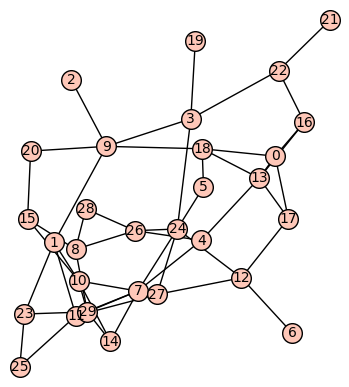

Graph on 30 vertices (use the .plot() method to plot)

In [57]:
nakljucni_graf(30, 50)

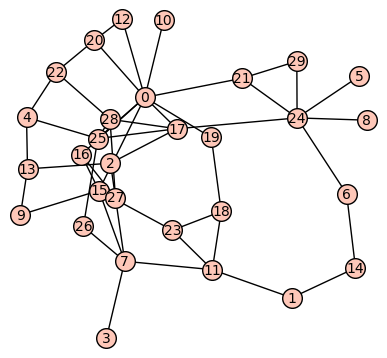

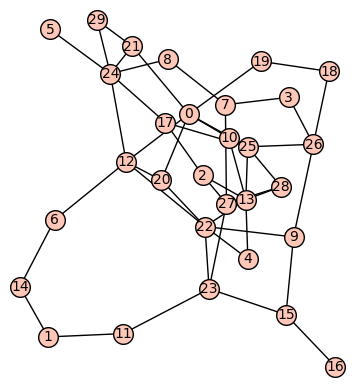

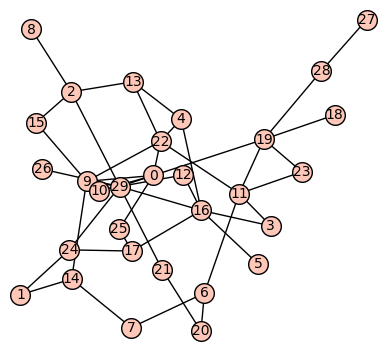

(15, [Graph on 30 vertices, Graph on 30 vertices, Graph on 30 vertices])

In [67]:
najvecje_razlike(nakljucni_graf(30, 50))

In [0]:
# Za male grafe do 8 vozlišč sva preverili domnevo, za n = 9 nama program ne vrne več rezultata. Ali je to okej?
# Ali je za grafe do n = 8 dovolj samo potrditi domnevo, ali morava tudi tu iskati minimalne in maksimalne razlike?
# Kako naj doseževa, da se vrnjeni grafi ne ponavljajo v seznamu?
# Ali mora naključno generiranje grafa samo izbrati število povezav, ali določiva midve? Če sami, kako?
# Zakaj nama program dela tako hitro? oz. na koliko vozlišč naj preizkušava domnevo, da bo delalo dlje časa.
# Katere karakteristike grafov naj gledava in s katerimi funkcijami (oz. kako opaziva skupne karakteristike?)
# Kaj je še potrebno v nadaljevanju narediti?
# Ali morava napisati še funkcijo, ki išeče samo enakost?